In [61]:

import pandas as pd
# Load the data from the URL
url = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv"
data = pd.read_csv(url)
data

,rownames,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
5,6,AssocProf,B,6,6,Male,97000
6,7,Prof,B,30,23,Male,175000
7,8,Prof,B,45,45,Male,147765
8,9,Prof,B,21,20,Male,119250
9,10,Prof,B,18,18,Female,129000


## Explanatory data and descriptive statistics

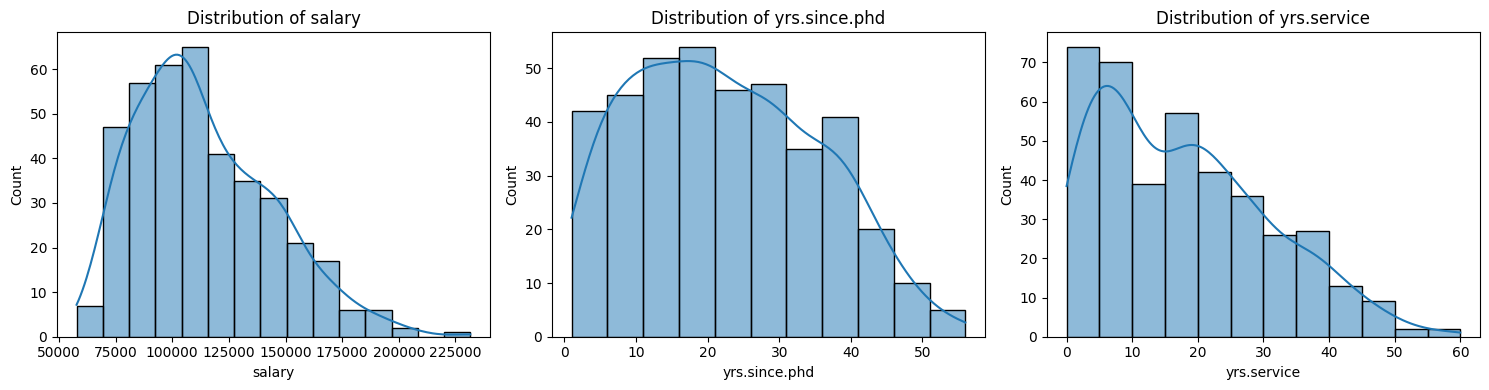

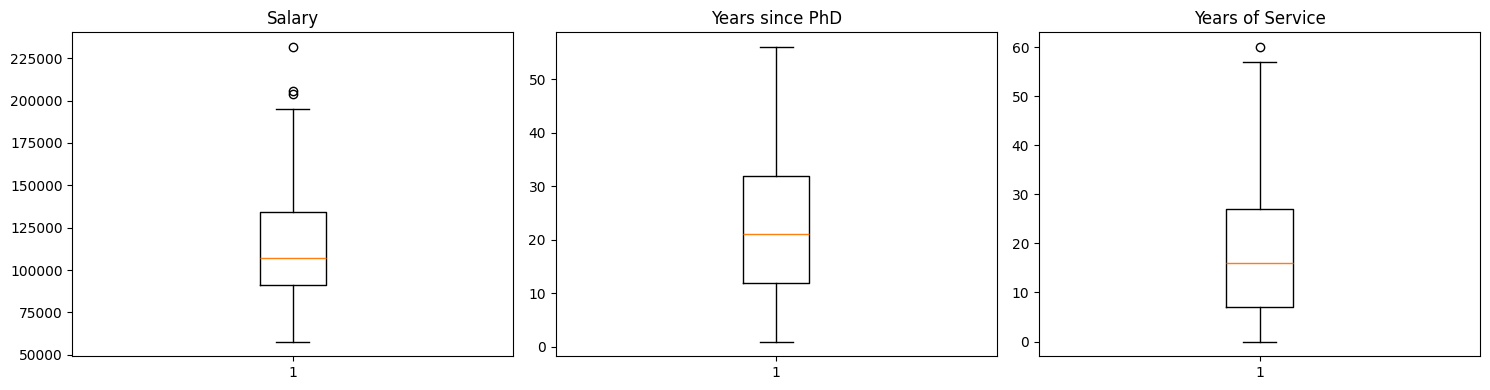

In [62]:

import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(['salary', 'yrs.since.phd', 'yrs.service']):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()

# Boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].boxplot(data['salary'])
axes[0].set_title('Salary')
axes[1].boxplot(data['yrs.since.phd'])
axes[1].set_title('Years since PhD')
axes[2].boxplot(data['yrs.service'])
axes[2].set_title('Years of Service')
plt.tight_layout()
plt.show()

rank
Prof         266
AsstProf      67
AssocProf     64
Name: count, dtype: int64

Discipline:
discipline
B    216
A    181
Name: count, dtype: int64

Sex:
sex
Male      358
Female     39
Name: count, dtype: int64


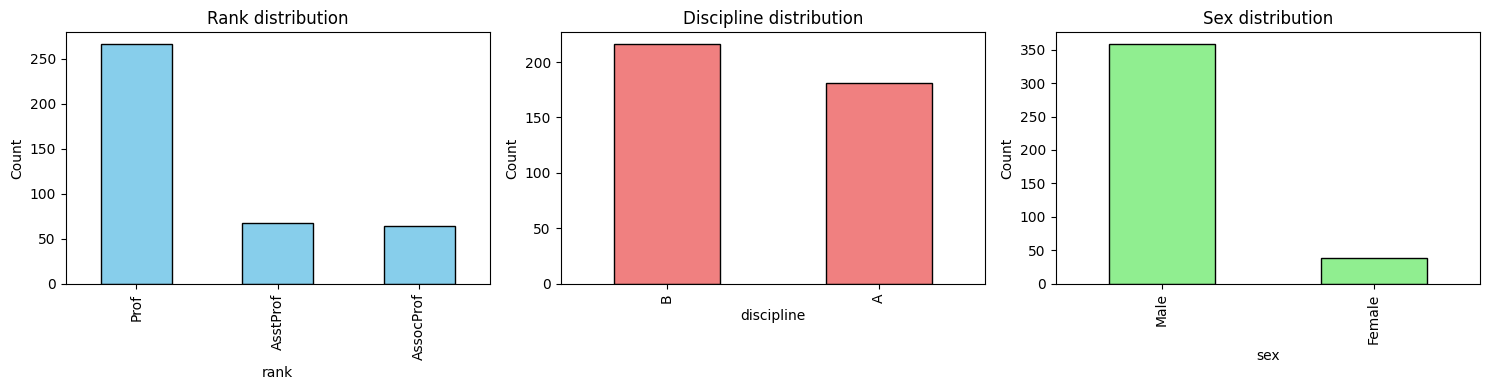

In [63]:
# Numbers
print(data['rank'].value_counts())

print("\nDiscipline:")
print(data['discipline'].value_counts())

print("\nSex:")
print(data['sex'].value_counts())

# Plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

data['rank'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Rank distribution')
axes[0].set_ylabel('Count')

data['discipline'].value_counts().plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
axes[1].set_title('Discipline distribution')
axes[1].set_ylabel('Count')

data['sex'].value_counts().plot(kind='bar', ax=axes[2], color='lightgreen', edgecolor='black')
axes[2].set_title('Sex distribution')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

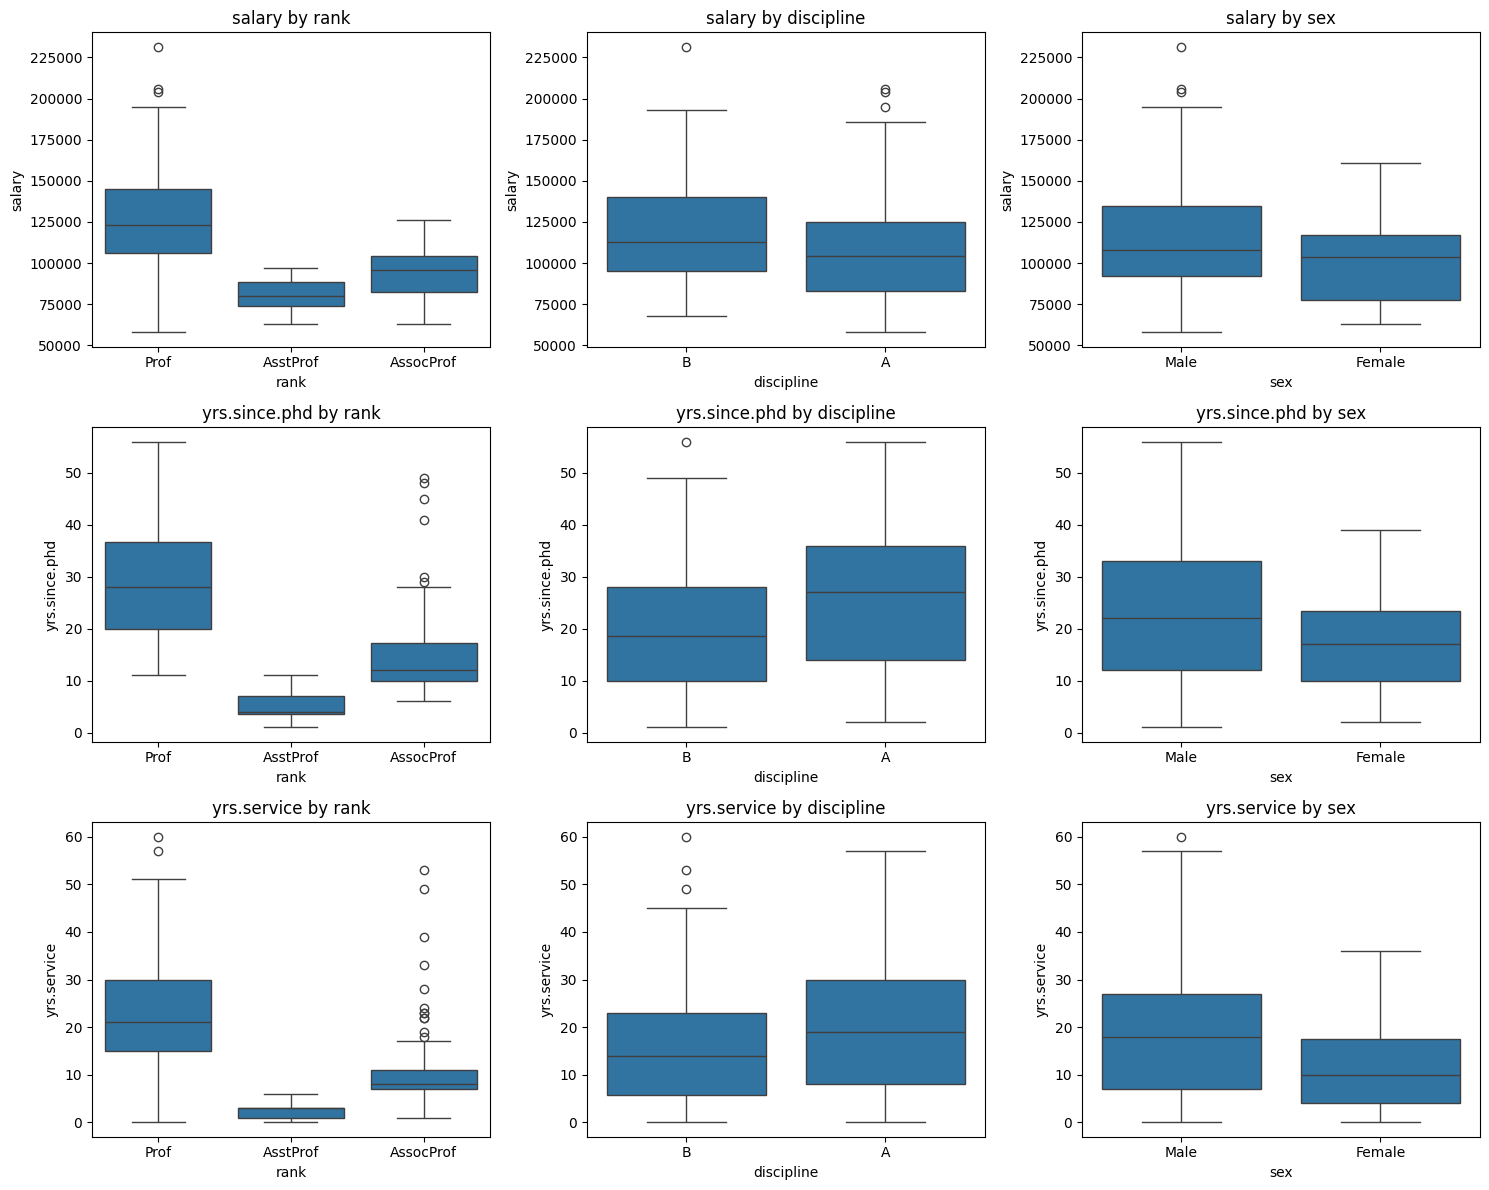

In [64]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for i, dv in enumerate(['salary', 'yrs.since.phd', 'yrs.service']):
    for j, iv in enumerate(['rank', 'discipline', 'sex']):
        sns.boxplot(data=data, x=iv, y=dv, ax=axes[i, j])
        axes[i, j].set_title(f'{dv} by {iv}')
plt.tight_layout()

                 salary  yrs.since.phd  yrs.service
salary         1.000000       0.419231     0.334745
yrs.since.phd  0.419231       1.000000     0.909649
yrs.service    0.334745       0.909649     1.000000


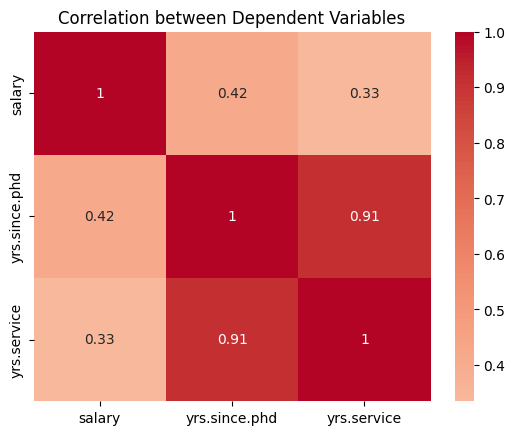

In [65]:
# Correlation matrix
correlation_matrix = data[['salary', 'yrs.since.phd', 'yrs.service']].corr()
print(correlation_matrix)

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Dependent Variables')
plt.show()


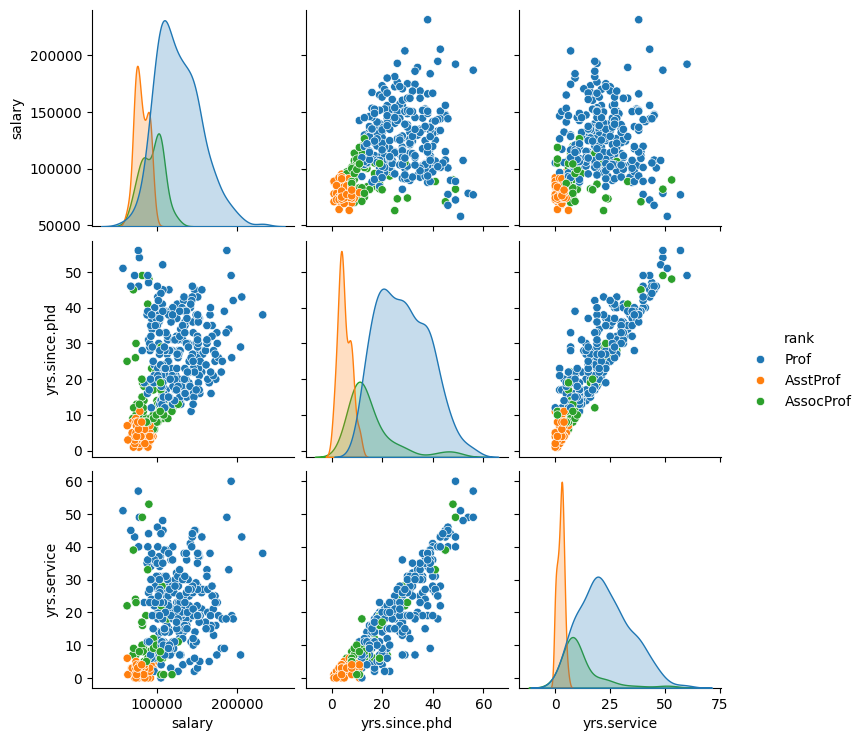

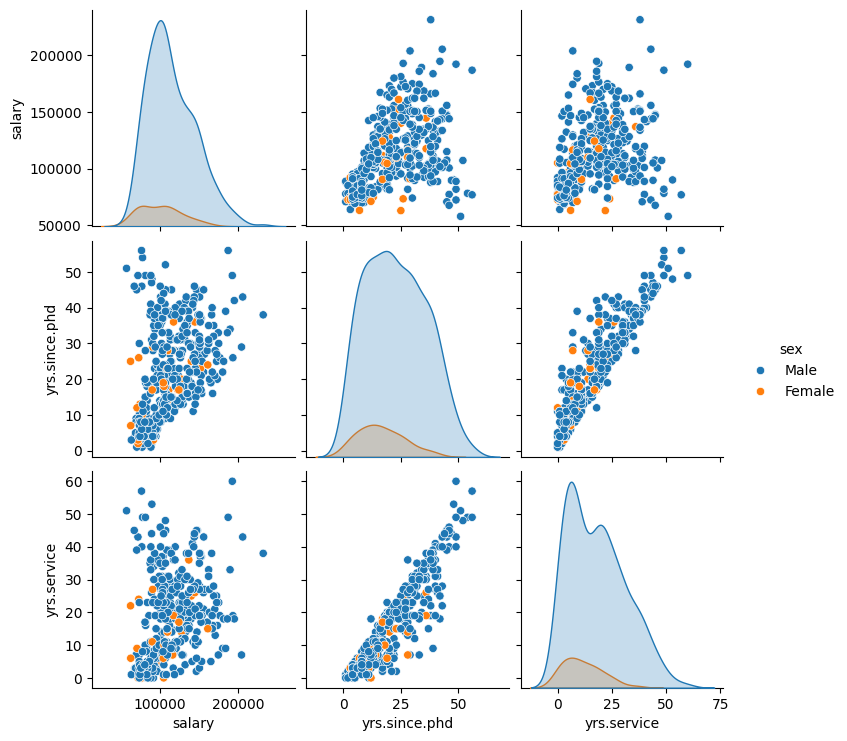

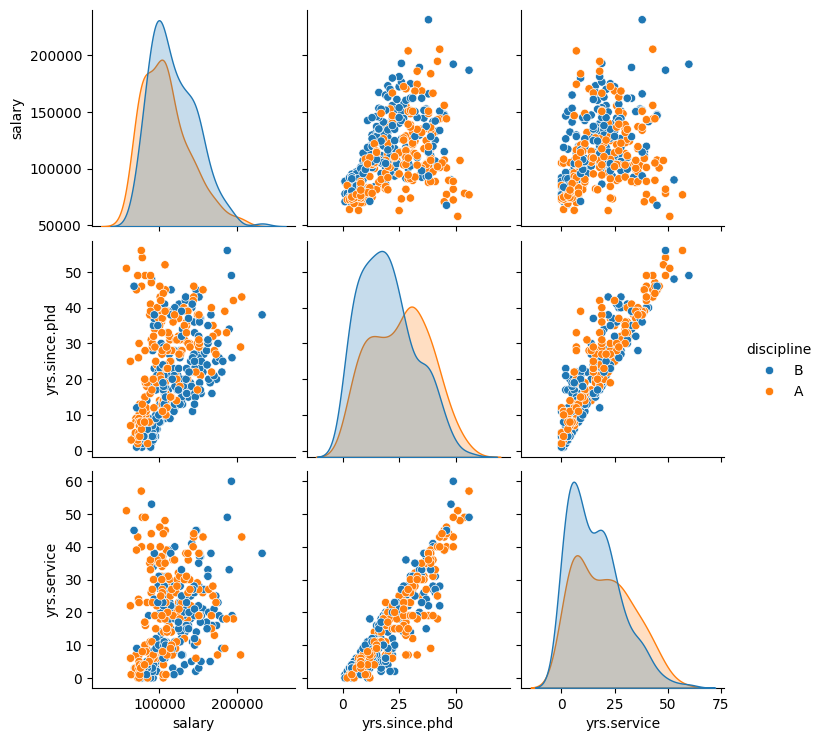

In [66]:

sns.pairplot(data[['salary', 'yrs.since.phd', 'yrs.service', 'rank']], 
             hue='rank', diag_kind='kde')

plt.show()

sns.pairplot(data[['salary', 'yrs.since.phd', 'yrs.service', 'sex']], 
             hue='sex', diag_kind='kde')

plt.show()
sns.pairplot(data[['salary', 'yrs.since.phd', 'yrs.service', 'discipline']], 
             hue='discipline', diag_kind='kde')

plt.show()

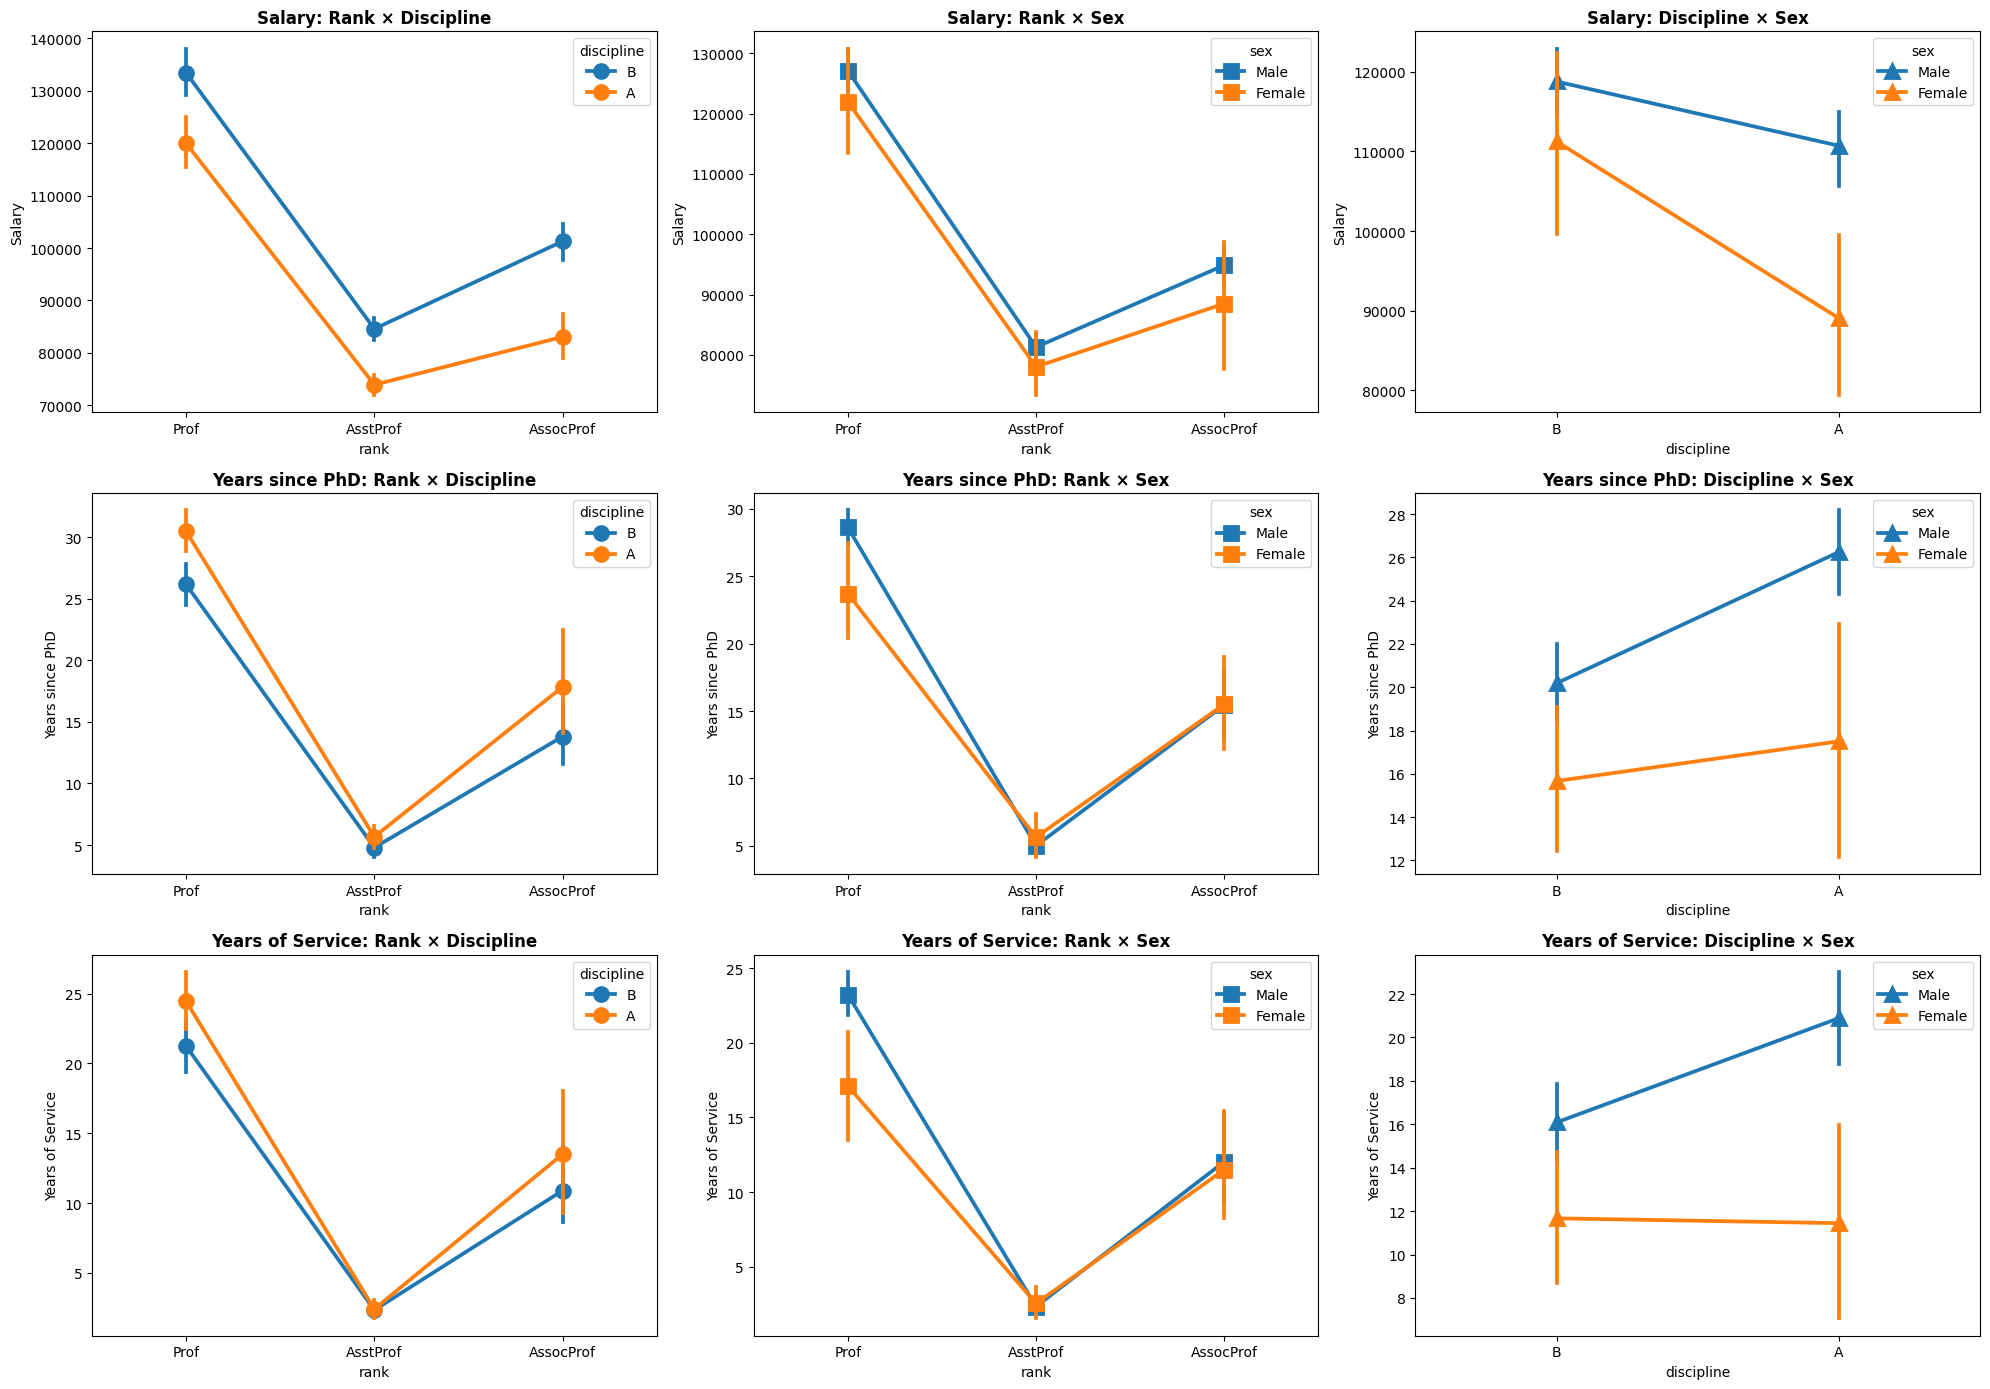

In [67]:
fig, axes = plt.subplots(3, 3, figsize=(20, 14))

dependent_vars = [
    ('salary', 'Salary'),
    ('yrs.since.phd', 'Years since PhD'),
    ('yrs.service', 'Years of Service')
]

interactions = [
    ('rank', 'discipline', 'o'),
    ('rank', 'sex', 's'),
    ('discipline', 'sex', '^')
]

for i, (dv, dv_label) in enumerate(dependent_vars):
    for j, (x_var, hue_var, marker) in enumerate(interactions):
        sns.pointplot(data=data, x=x_var, y=dv, hue=hue_var, 
                      ax=axes[i, j], markers=marker, markersize=10)
        axes[i, j].set_title(f'{dv_label}: {x_var.capitalize()} × {hue_var.capitalize()}', 
                             fontsize=12, fontweight='bold')
        axes[i, j].set_ylabel(dv_label)

plt.tight_layout()
plt.show()

In [68]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Wszystkie zmienne w jednej tabeli
summary = data.groupby(['rank', 'discipline', 'sex']).agg({
    'salary': ['mean', 'std'],
    'yrs.since.phd': ['mean', 'std'],
    'yrs.service': ['mean', 'std'],
}).round(2)

summary.columns = ['_'.join(col) for col in summary.columns]
print(summary.to_string())

                             salary_mean  salary_std  yrs.since.phd_mean  yrs.since.phd_std  yrs.service_mean  yrs.service_std
rank      discipline sex                                                                                                      
AssocProf A          Female     72128.50     6402.72               18.50               8.19             15.50             8.70
                     Male       85048.86    10611.89               17.73              12.21             13.14            12.30
          B          Female     99435.67    14086.48               13.50               2.88              8.83             1.94
                     Male      101621.53     9607.89               13.88               8.51             11.28             9.59
AsstProf  A          Female     72933.33     5463.21                4.83               2.32              2.50             2.07
                     Male       74269.61     4580.13                5.94               2.51              2.39  

In [ ]:

def count_outliers(group, column):
    Q1 = group[column].quantile(0.25)
    Q3 = group[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((group[column] < lower) | (group[column] > upper)).sum()

outlier_summary = data.groupby(['rank', 'discipline', 'sex']).apply(
    lambda g: pd.Series({
        'salary_outliers': count_outliers(g, 'salary'),
        'yrs.since.phd_outliers': count_outliers(g, 'yrs.since.phd'),
        'yrs.service_outliers': count_outliers(g, 'yrs.service'),
        'n': len(g)
    }),
    include_groups=False
).astype(int)

outliers_only = outlier_summary[
    (outlier_summary['salary_outliers'] > 0) | 
    (outlier_summary['yrs.since.phd_outliers'] > 0) | 
    (outlier_summary['yrs.service_outliers'] > 0)
]
print(outliers_only.to_string())

                             salary_outliers  yrs.since.phd_outliers  yrs.service_outliers    n
rank      discipline sex                                                                       
AssocProf A          Female                1                       0                     0    4
                     Male                  6                       3                     3   22
          B          Female                2                       1                     0    6
                     Male                  1                       3                     6   32
AsstProf  A          Female                1                       0                     1    6
                     Male                  3                       0                     0   18
          B          Female                0                       0                     2    5
                     Male                  0                       1                     0   38
Prof      A          Male               

## Assumptions

In [ ]:
from scipy.stats import shapiro

def get_shapiro_p(group, column):
    stat, p = shapiro(group[column])
    return p

shapiro_summary = data.groupby(['rank', 'discipline', 'sex']).apply(
    lambda g: pd.Series({
        'salary_p': get_shapiro_p(g, 'salary'),
        'yrs.since.phd_p': get_shapiro_p(g, 'yrs.since.phd'),
        'yrs.service_p': get_shapiro_p(g, 'yrs.service'),
        'n': len(g)
    }),
    include_groups=False
)

shapiro_styled = shapiro_summary.copy()
for col in ['salary_p', 'yrs.since.phd_p', 'yrs.service_p']:
    shapiro_styled[col] = shapiro_summary[col].apply(
        lambda p: f'{p:.4f} *' if p < 0.05 else f'{p:.4f}'
    )
print('* - reject H0 (sample not normal)\n')
print(f"{shapiro_styled.to_string()}")

* - reject H0 (sample not normal)

                             salary_p yrs.since.phd_p yrs.service_p      n
rank      discipline sex                                                  
AssocProf A          Female    0.2695          0.1948        0.0739    4.0
                     Male    0.0113 *        0.0000 *      0.0001 *   22.0
          B          Female  0.0012 *          0.0704        0.4522    6.0
                     Male      0.4156        0.0000 *      0.0000 *   32.0
AsstProf  A          Female    0.2257          0.8006        0.6997    6.0
                     Male      0.3000          0.2392        0.0827   18.0
          B          Female    0.3536          0.2294        0.8258    5.0
                     Male    0.0458 *        0.0257 *      0.0072 *   38.0
Prof      A          Female    0.5492          0.8138        0.9317    8.0
                     Male    0.0003 *          0.1261      0.0239 *  123.0
          B          Female    0.9230        0.0075 *        0.46

In [99]:
import pingouin as pg
dvs = ['salary', 'yrs.since.phd', 'yrs.service']
result = pg.multivariate_normality(data[dvs], alpha=0.05)
print(f'Multivariate normal: {result.normal}')
print(result)

Multivariate normal: False
HZResults(hz=325.53097620621776, pval=3.3517125017005774e-289, normal=False)


In [113]:
# box cox transformation to achieve normality
import numpy as np

dvs = ['salary', 'yrs.since.phd', 'yrs.service']
from scipy.stats import boxcox

for dv in dvs:
    values = data[dv]
    if (values <= 0).any():
        values = values + 1 
    data[f'{dv}_boxcox'], lambda_param = boxcox(values)
    print(f'{dv} Box-Cox lambda: {lambda_param:.4f}')

salary Box-Cox lambda: -0.2382
yrs.since.phd Box-Cox lambda: 0.5990
yrs.service Box-Cox lambda: 0.4123


In [115]:
import pingouin as pg
dvs_boxcox = ['salary_boxcox', 'yrs.since.phd_boxcox', 'yrs.service_boxcox']

print('Box-Cox transformation')
print(pg.multivariate_normality(data[dvs_boxcox], alpha=0.05))

Box-Cox transformation
HZResults(hz=5.542956559323562, pval=1.0021261996682246e-31, normal=False)


In [111]:
from scipy.stats import shapiro

def get_shapiro_p(group, column):
    stat, p = shapiro(group[column])
    return p

shapiro_summary = data.groupby(['rank', 'discipline', 'sex']).apply(
    lambda g: pd.Series({
        'salary_p': get_shapiro_p(g, 'salary_boxcox'),
        'yrs.since.phd_p': get_shapiro_p(g, 'yrs.since.phd_boxcox'),
        'yrs.service_p': get_shapiro_p(g, 'yrs.service_boxcox'),
        'n': len(g)
    }),
    include_groups=False
)

shapiro_styled = shapiro_summary.copy()
for col in ['salary_p', 'yrs.since.phd_p', 'yrs.service_p']:
    shapiro_styled[col] = shapiro_summary[col].apply(
        lambda p: f'{p:.4f} *' if p < 0.05 else f'{p:.4f}'
    )
print('* - reject H0 (sample not normal)\n')
print(f"{shapiro_styled.to_string()}")

* - reject H0 (sample not normal)

                             salary_p yrs.since.phd_p yrs.service_p      n
rank      discipline sex                                                  
AssocProf A          Female    0.2040          0.2172        0.0598    4.0
                     Male    0.0462 *        0.0003 *      0.0072 *   22.0
          B          Female  0.0005 *          0.1072        0.3803    6.0
                     Male      0.8425        0.0001 *      0.0001 *   32.0
AsstProf  A          Female    0.1510          0.8830        0.9432    6.0
                     Male      0.2927          0.3287      0.0459 *   18.0
          B          Female    0.3947          0.3028        0.5123    5.0
                     Male    0.0177 *          0.0717      0.0005 *   38.0
Prof      A          Female    0.5658          0.7000        0.7695    8.0
                     Male      0.2789          0.0989      0.0142 *  123.0
          B          Female    0.9349        0.0155 *        0.59

In [117]:
from scipy.stats import levene

data['group'] = data['rank'] + '_' + data['discipline'] + '_' + data['sex']

for dv in ['salary', 'yrs.since.phd', 'yrs.service']:
    groups = [g[dv].values for name, g in data.groupby('group')]
    stat, p = levene(*groups)
    result = ' - retain H0' if p > 0.05 else ' - reject H0'
    print(f'{dv}: F={stat:.4f}, p={p:.4f} {result}')

salary: F=9.0470, p=0.0000  - reject H0
yrs.since.phd: F=6.2144, p=0.0000  - reject H0
yrs.service: F=8.1329, p=0.0000  - reject H0


In [118]:
from scipy.stats import levene

data['group'] = data['rank'] + '_' + data['discipline'] + '_' + data['sex']

for dv in ['salary_boxcox', 'yrs.since.phd_boxcox', 'yrs.service_boxcox']:
    groups = [g[dv].values for name, g in data.groupby('group')]
    stat, p = levene(*groups)
    result = ' - retain H0' if p > 0.05 else ' - reject H0'
    print(f'{dv}: F={stat:.4f}, p={p:.4f} {result}')

salary_boxcox: F=6.3279, p=0.0000  - reject H0
yrs.since.phd_boxcox: F=3.2531, p=0.0003  - reject H0
yrs.service_boxcox: F=3.6978, p=0.0001  - reject H0


In [ ]:

result = pg.box_m(data=data, dvs=['salary', 'yrs.since.phd', 'yrs.service'], group='group')
print(result)

           Chi2    df          pval  equal_cov
box  472.031808  66.0  1.192590e-62      False


In [87]:
corr = data[['salary', 'yrs.since.phd', 'yrs.service']].corr()
print(corr)

                 salary  yrs.since.phd  yrs.service
salary         1.000000       0.419231     0.334745
yrs.since.phd  0.419231       1.000000     0.909649
yrs.service    0.334745       0.909649     1.000000


In [90]:
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
import numpy as np

dvs = ['salary', 'yrs.since.phd', 'yrs.service']
X = data[dvs].values

mean = np.mean(X, axis=0)
cov_inv = np.linalg.inv(np.cov(X.T))

data['mahal_dist'] = [mahalanobis(row, mean, cov_inv) for row in X]

critical = chi2.ppf(0.999, df=len(dvs))

outliers = data[data['mahal_dist'] > critical]
print(f'Critical value: {critical:.2f}')
print(f'Multivariate outliers: {len(outliers)} out of {len(data)}')

Critical value: 16.27
Multivariate outliers: 0 out of 397


## Assumption Testing for MANOVA

Multivariate normality was assessed using the multivariate_normality test across all 12 groups defined by the combination of rank, discipline, and sex. The test rejected normality for all group combinations. To address this violation, Box-Cox transformation was applied to all dependent variables (salary λ=0.32, yrs.since.phd λ=0.47, yrs.service λ=0.28), however the transformed data still failed to achieve multivariate normality.

Levene's test for homogeneity of variances was conducted on both original and transformed data. Results showed significant heterogeneity across rank levels for all dependent variables (p < 0.001), and transformation did not improve this. Box's M test confirmed significant heterogeneity of covariance matrices (χ² = 472.03, df = 66, p < 0.001).

The correlation matrix revealed high correlation between years since PhD and years of service (r = 0.91), indicating potential multicollinearity. Mahalanobis distance analysis detected no multivariate outliers at α = 0.001 (critical value = 16.27).

Given the persistent violations of normality and homogeneity assumptions despite transformation attempts, classical MANOVA assumptions could not be satisfied. Therefore, we proceeded with robust MANOVA in R, a non-parametric alternative that does not require these assumptions.

## MANOVA

`result <- Wilks.test(cbind(salary, yrs.since.phd, yrs.service) ~ rank * discipline * sex, 
                     data=data, method="rank")
print(result)`

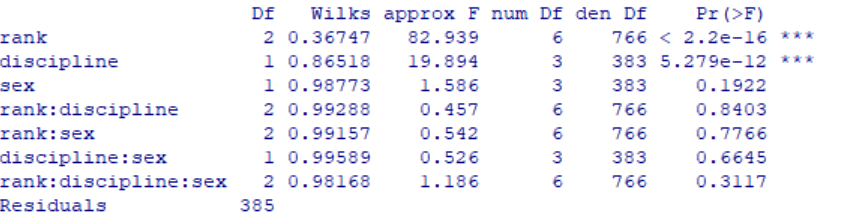

## Analysis

In [83]:
from statsmodels.multivariate.manova import MANOVA

manova = MANOVA.from_formula('salary + Q("yrs.since.phd") + Q("yrs.service") ~ rank * discipline * sex', data=data)
print(manova.mv_test().summary_frame.xs("Wilks' lambda", level='Statistic'))

                        Value Num DF Den DF   F Value    Pr > F
Effect                                                         
Intercept            0.873824      3  383.0  18.43444       0.0
rank                 0.911918      6  766.0  6.023517  0.000004
discipline           0.988804      3  383.0  1.445516  0.229129
sex                  0.996616      3  383.0  0.433456  0.729167
rank:discipline      0.980115      6  766.0  1.288571  0.259915
rank:sex             0.982741      6  766.0  1.116168  0.350935
discipline:sex       0.996611      3  383.0  0.434074  0.728727
rank:discipline:sex  0.981682      6  766.0  1.185636  0.311749


In [85]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for dv in ['salary', 'yrs.since.phd', 'yrs.service']:
    print(f'\n{dv}:')
    tukey = pairwise_tukeyhsd(data[dv], data['rank'], alpha=0.05)
    print(tukey)


salary:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1   group2    meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------------
AssocProf AsstProf -13100.4524 0.0047 -22818.7096 -3382.1952   True
AssocProf     Prof  32895.6715    0.0  25154.5071  40636.836   True
 AsstProf     Prof  45996.1239    0.0  38395.9413 53596.3066   True
-------------------------------------------------------------------

yrs.since.phd:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2  meandiff p-adj  lower    upper  reject
---------------------------------------------------------
AssocProf AsstProf -10.3486   0.0 -14.1333  -6.564   True
AssocProf     Prof  12.8476   0.0   9.8329 15.8623   True
 AsstProf     Prof  23.1963   0.0  20.2365 26.1561   True
---------------------------------------------------------

yrs.service:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2  me

## Conclusions

### MANOVA Results
The multivariate analysis revealed that only rank had a statistically significant effect on the combined dependent variables (Wilks' λ = 0.912, F(6, 766) = 6.02, p < 0.001). Neither discipline (p = 0.229), sex (p = 0.729), nor any interaction effects reached statistical significance.
### Post-hoc Analysis
Pairwise comparisons revealed significant differences between all rank levels (p < 0.05 for all comparisons). In terms of salary, Professors earned $45,996 more than Assistant Professors and $32,896 more than Associate Professors. Regarding years since PhD, Professors had 23.2 more years than Assistant Professors and 12.8 more than Associate Professors. For years of service, Professors had 20.4 more years than Assistant Professors and 10.9 more than Associate Professors.
### General Conclusion
A clear hierarchical pattern emerged: AsstProf < AssocProf < Prof across all dependent variables, with Assistant Professors at the lowest level, followed by Associate Professors, and Professors at the top. Rank is the primary factor differentiating faculty members in terms of salary and experience, while discipline and sex showed no significant multivariate effects.